In [39]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv('TransformedData.csv')
df.head()

,Year,MAG,MAG5yr,MAG10yr,Count_L,Count_S
0,1980,0.660465,0.546584,0.496552,0.0,0.000000
1,1981,0.851163,0.801242,0.779310,0.2,0.003733
2,1982,0.851163,0.801242,0.779310,0.4,0.002750
3,1983,1.000000,1.000000,1.000000,0.8,0.004757
4,1984,1.000000,1.000000,1.000000,0.8,0.005010


In [41]:
df.head()

,Year,MAG,MAG5yr,MAG10yr,Count_L,Count_S
0,1980,0.660465,0.546584,0.496552,0.0,0.000000
1,1981,0.851163,0.801242,0.779310,0.2,0.003733
2,1982,0.851163,0.801242,0.779310,0.4,0.002750
3,1983,1.000000,1.000000,1.000000,0.8,0.004757
4,1984,1.000000,1.000000,1.000000,0.8,0.005010


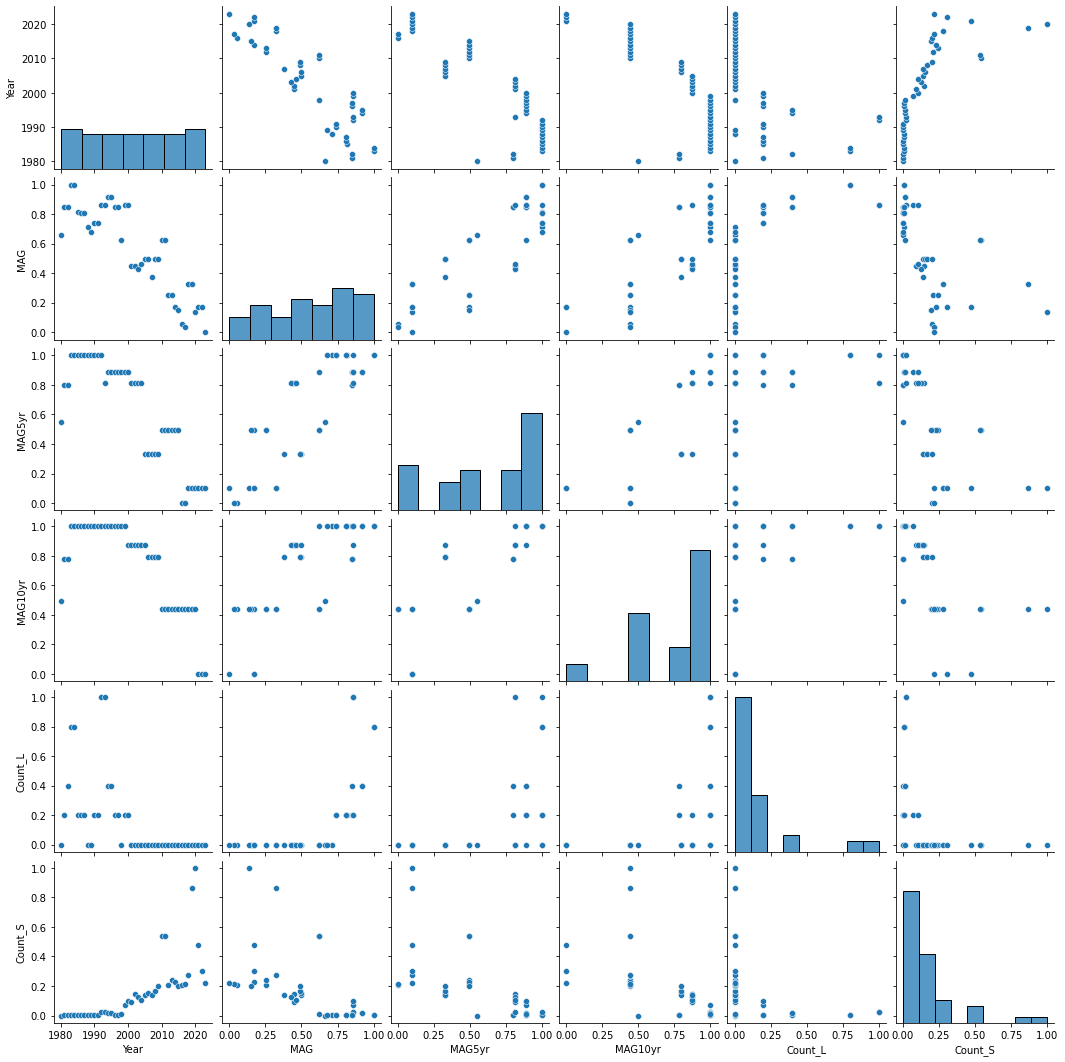

In [42]:

# Plot the scatter plot matrix
sns.pairplot(df)
plt.show()

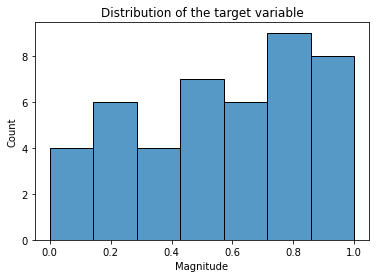

In [43]:

# Plot the distribution of the target variable
sns.histplot(df['MAG'])
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.title('Distribution of the target variable')
plt.show()

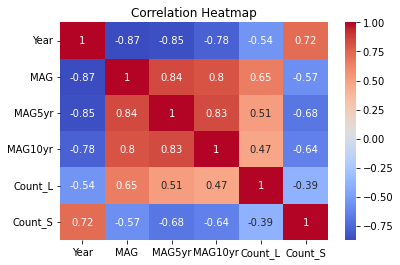

In [44]:
# Compute the correlation matrix
corr = df.corr()

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

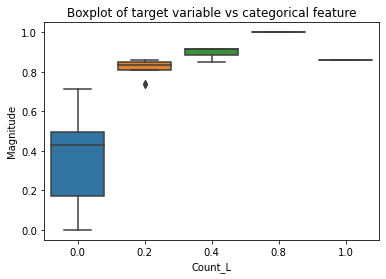

In [45]:
# Plot a boxplot of the target variable vs categorical feature
sns.boxplot(x='Count_L', y='MAG', data=df)
plt.xlabel('Count_L')
plt.ylabel('Magnitude')
plt.title('Boxplot of target variable vs categorical feature')
plt.show()

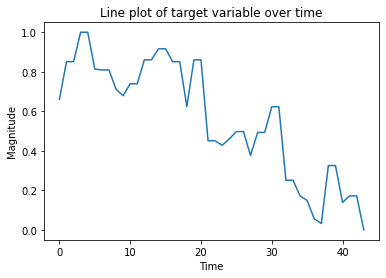

In [46]:

# Plot a line plot of the target variable over time
plt.plot(df['MAG'])
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Line plot of target variable over time')
plt.show()

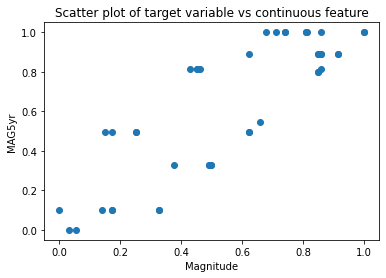

In [47]:

# Plot a scatter plot of the target variable vs continuous feature
plt.scatter(df['MAG'], df['MAG5yr'])
plt.xlabel('Magnitude')
plt.ylabel('MAG5yr')
plt.title('Scatter plot of target variable vs continuous feature')
plt.show()

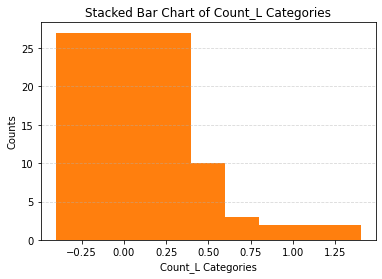

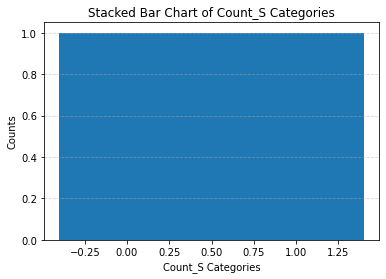

In [61]:
import matplotlib.pyplot as plt

# Calculate counts for each category
count_L_counts = df['Count_L'].value_counts()
count_S_counts = df['Count_S'].value_counts()

# Define custom colors
colors = ['#ff7f0e', '#1f77b4']

# Create a stacked bar chart for Count_L
plt.bar(count_L_counts.index, count_L_counts.values, color=colors[0])
plt.xlabel('Count_L Categories')
plt.ylabel('Counts')
plt.title('Stacked Bar Chart of Count_L Categories')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Create a stacked bar chart for Count_S
plt.bar(count_S_counts.index, count_S_counts.values, color=colors[1])
plt.xlabel('Count_S Categories')
plt.ylabel('Counts')
plt.title('Stacked Bar Chart of Count_S Categories')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


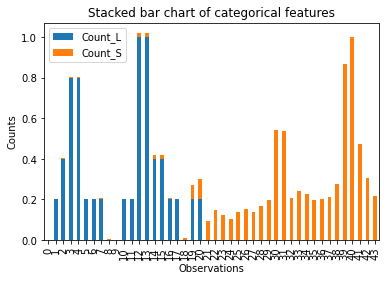

In [48]:

# Create a stacked bar chart of categorical features
df[['Count_L', 'Count_S']].plot(kind='bar', stacked=True)
plt.xlabel('Observations')
plt.ylabel('Counts')
plt.title('Stacked bar chart of categorical features')
plt.show()


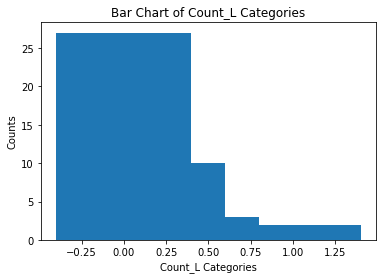

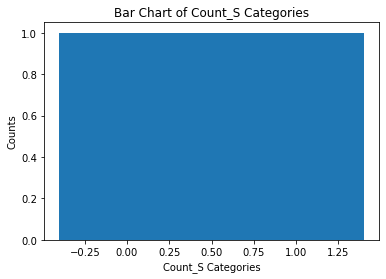

In [60]:
import matplotlib.pyplot as plt

# Calculate counts for each category
count_L_counts = df['Count_L'].value_counts()
count_S_counts = df['Count_S'].value_counts()

# Create a bar chart for Count_L
plt.bar(count_L_counts.index, count_L_counts.values)
plt.xlabel('Count_L Categories')
plt.ylabel('Counts')
plt.title('Bar Chart of Count_L Categories')
plt.show()

# Create a bar chart for Count_S
plt.bar(count_S_counts.index, count_S_counts.values)
plt.xlabel('Count_S Categories')
plt.ylabel('Counts')
plt.title('Bar Chart of Count_S Categories')
plt.show()


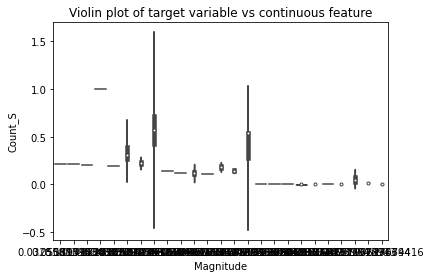

In [49]:

# Plot a violin plot of the target variable vs continuous feature
sns.violinplot(x='MAG', y='Count_S', data=df)
plt.xlabel('Magnitude')
plt.ylabel('Count_S')
plt.title('Violin plot of target variable vs continuous feature')
plt.show()

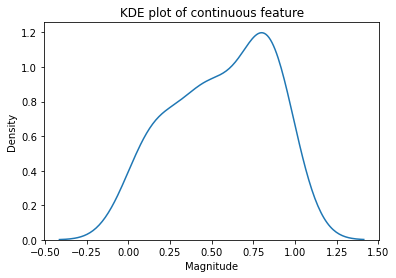

In [50]:
# Create a KDE plot of a continuous feature
sns.kdeplot(df['MAG'])
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.title('KDE plot of continuous feature')
plt.show()

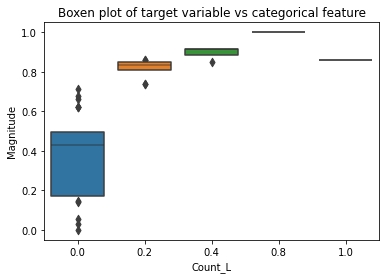

In [51]:
# Create a boxen plot of the target variable vs categorical feature
sns.boxenplot(x='Count_L', y='MAG', data=df)
plt.xlabel('Count_L')
plt.ylabel('Magnitude')
plt.title('Boxen plot of target variable vs categorical feature')
plt.show()

In [52]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Count_L','Count_S']],df[['MAG']], test_size=0.2, random_state=42)

# train a random forest model on the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# evaluate the model on the test data
predictions = rf_model.predict(X_test)

# compute the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)

# print the mean squared error of the predictions
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.0171


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Count_L', 'Count_S']], df[['MAG']], test_size=0.2, random_state=42)

# train a random forest model on the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# evaluate the model on the test data
predictions = rf_model.predict(X_test)

# compute the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)

# compute the root mean squared error (RMSE) of the predictions
rmse = np.sqrt(mse)

# compute the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, predictions)

# compute the R2 score of the predictions
r2 = r2_score(y_test, predictions)

# print the mean squared error, RMSE, MAE, and R2 score
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R2 Score: {r2:.4f}')


Mean Squared Error: 0.0171
Root Mean Squared Error: 0.1306
Mean Absolute Error: 0.1004
R2 Score: 0.8529


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Count_L', 'Count_S']], df[['MAG5yr']], test_size=0.2, random_state=42)

# train a random forest model on the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# evaluate the model on the test data
predictions = rf_model.predict(X_test)

# compute the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)

# compute the root mean squared error (RMSE) of the predictions
rmse = np.sqrt(mse)

# compute the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, predictions)

# compute the R2 score of the predictions
r2 = r2_score(y_test, predictions)

# print the mean squared error, RMSE, MAE, and R2 score
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R2 Score: {r2:.4f}')


Mean Squared Error: 0.0438
Root Mean Squared Error: 0.2092
Mean Absolute Error: 0.1606
R2 Score: 0.7429


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Count_L', 'Count_S']], df[['MAG10yr']], test_size=0.2, random_state=42)

# train a random forest model on the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# evaluate the model on the test data
predictions = rf_model.predict(X_test)

# compute the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)

# compute the root mean squared error (RMSE) of the predictions
rmse = np.sqrt(mse)

# compute the mean absolute error (MAE) of the predictions
mae = mean_absolute_error(y_test, predictions)

# compute the R2 score of the predictions
r2 = r2_score(y_test, predictions)

# print the mean squared error, RMSE, MAE, and R2 score
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R2 Score: {r2:.4f}')


Mean Squared Error: 0.0186
Root Mean Squared Error: 0.1364
Mean Absolute Error: 0.0816
R2 Score: 0.7180


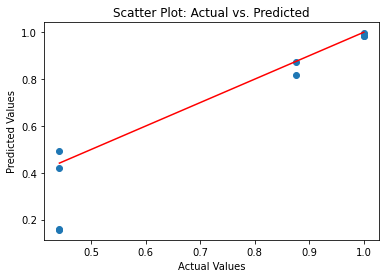

In [68]:
import matplotlib.pyplot as plt

# Plot the scatter plot
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs. Predicted')
plt.show()


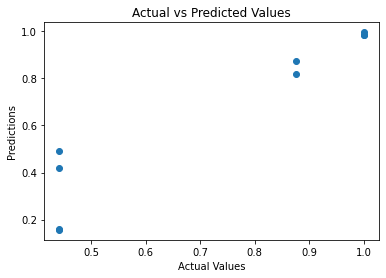

In [56]:
import matplotlib.pyplot as plt

# Scatter plot of predictions vs actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Values')
plt.show()


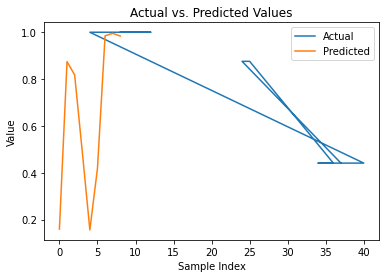

In [57]:
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


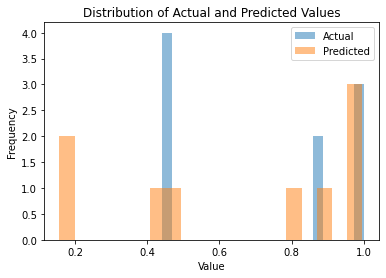

In [58]:
plt.hist(y_test, bins=20, alpha=0.5, label='Actual')
plt.hist(predictions, bins=20, alpha=0.5, label='Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Values')
plt.legend()
plt.show()

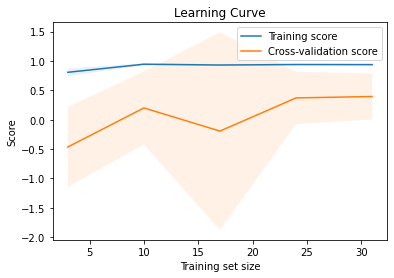

In [20]:
import numpy as np
from sklearn.model_selection import learning_curve

# Create a learning curve for the random forest model
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=10)

# Calculate the mean and standard deviation of the train and test scores for each training set size
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a line plot of the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()
